In [91]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import integrate

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [92]:
print(stats.norm.cdf(1)) #Giving correct value
print(stats.norm.ppf(0.8413447460685429)) #Giving correct value
print(stats.norm.cdf(-1)) #Giving correct value

0.8413447460685429
1.0
0.15865525393145707


Currently a positive sigma refers the the area under the curve to the left of the point we define and if a negative sigma is passed in it still measures the integral or area under the curve to the left of the defined value. Another way of seeing it is that, if we take x to mean stat.norm.cdf(1), then stats.norm.cdf(-1) = 1 - x or the area to the right of sigma = 1. I'll deal with it by ...

In [112]:
d = stats.rayleigh.rvs(size = 100000)

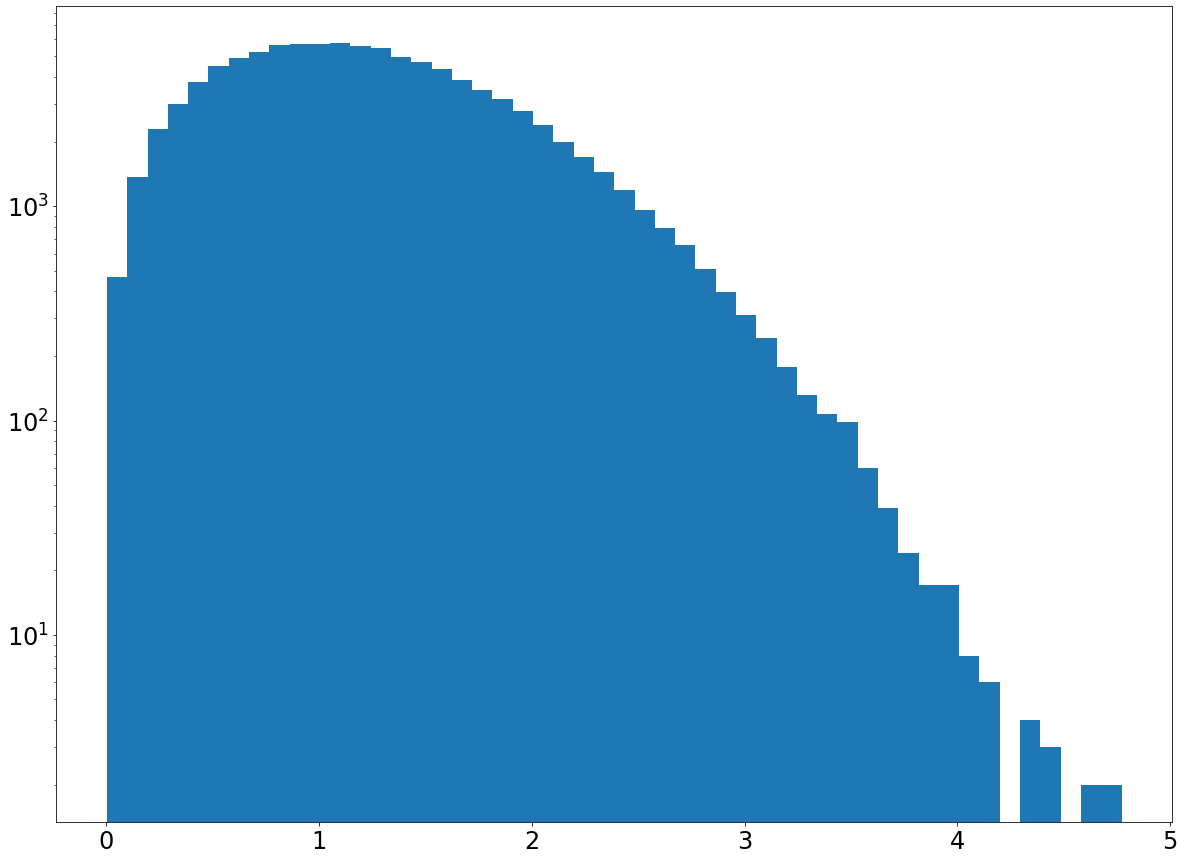

In [113]:
ax = plt.hist(d,50)
plt.yscale('log')
plt.tick_params(labelsize = 24)
# plt.xlim([4.95,5.05])
plt.show()

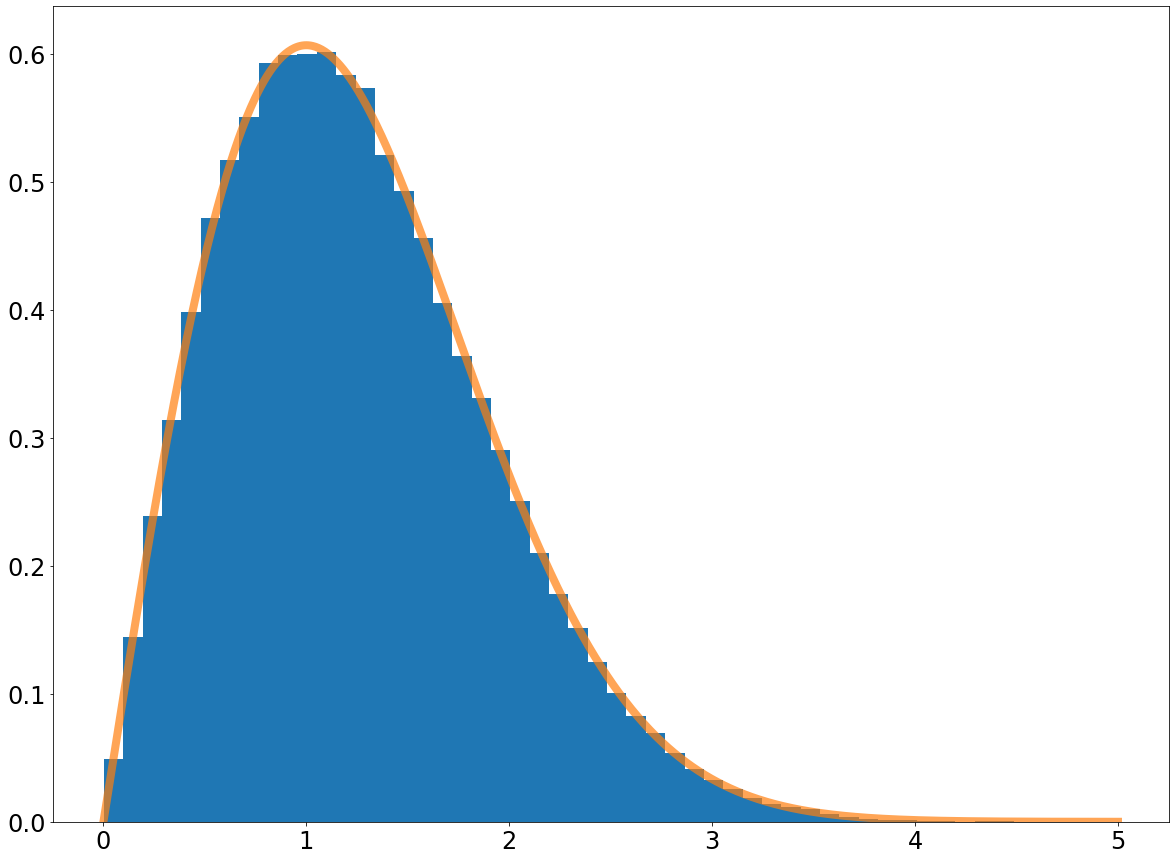

In [118]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
# plt.xlim([4.95,5.05])
x = np.linspace(0, 5, 1000)
ax.plot(x,stats.rayleigh.pdf(x),linewidth = 8,alpha = 0.7)
plt.show()

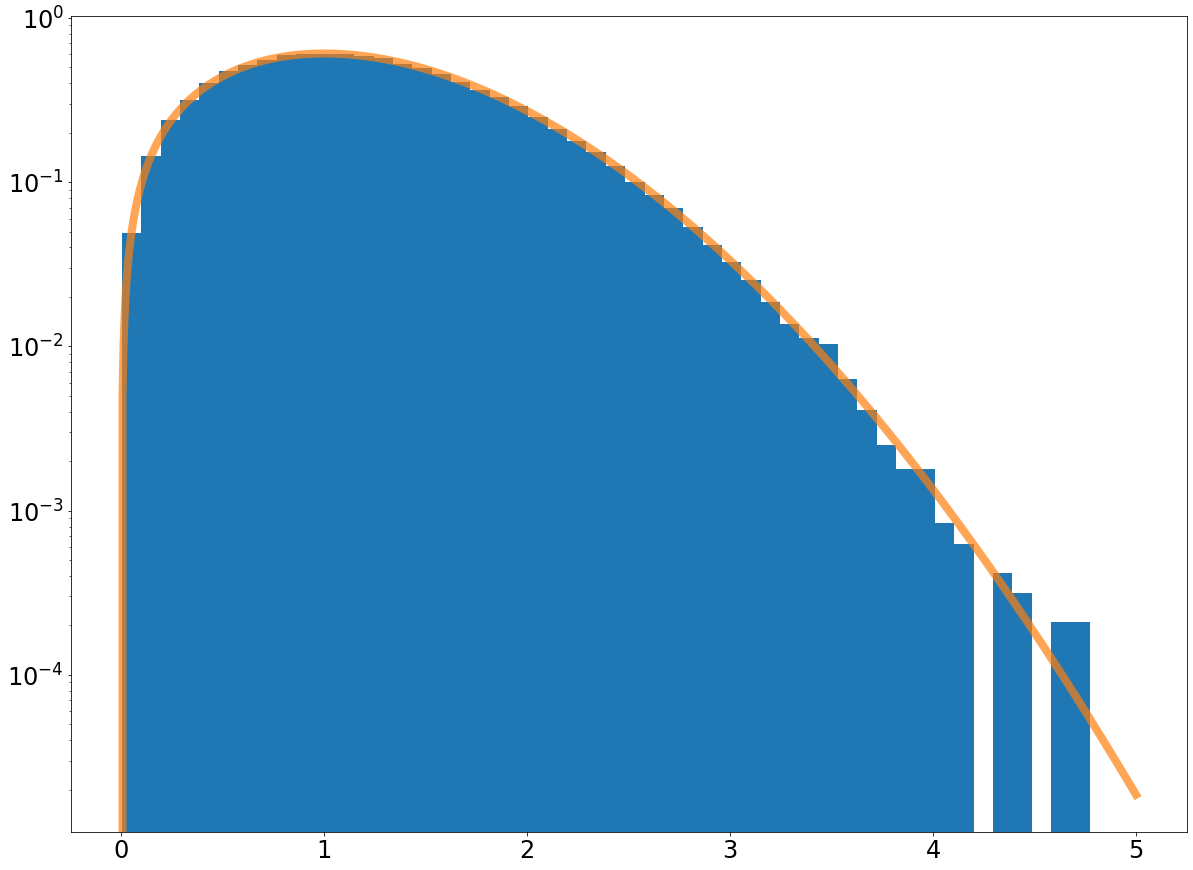

In [119]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
# plt.xlim([4.95,5.05])
x = np.linspace(0, 5,1000)
ax.plot(x,stats.rayleigh.pdf(x),linewidth = 8,alpha = 0.7)
plt.show()

3a. The value I am going to select is 5.015
3b. the statistical question I have is what is the probability that a given sample is <= 5.015
3c. (from 0 to 5.015) integral((t/b^2) * e^((-t^2)/(2b^2))dt

In [123]:
print(stats.rayleigh.cdf(1.5))

0.6753475326416503


3e.

In [125]:
print(stats.norm.ppf(0.6753475326416503))

0.454727999525734


4)

In [127]:
print(stats.rayleigh.cdf(1))
print(stats.norm.ppf(3934693402873666))

print(stats.rayleigh.cdf(2))
print(stats.norm.ppf(0.8646647167633873))

print(stats.rayleigh.cdf(2.5))
print(stats.norm.ppf(0.9560630663765926))

0.3934693402873666
nan
0.8646647167633873
1.1015196284987503
0.9560630663765926
1.7067212947438688


Non-continuous distributions

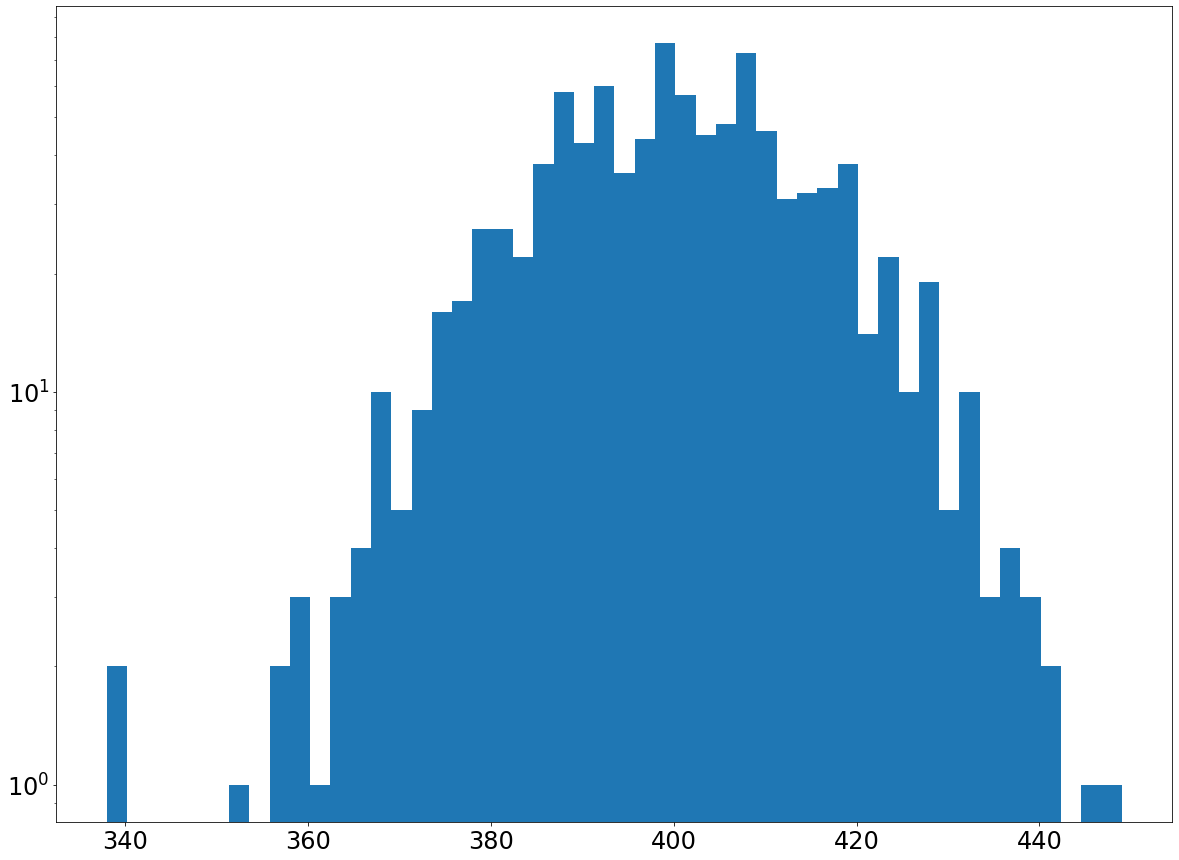

In [144]:
n, p = 1000, 0.4
d = stats.binom.rvs(n, p, size = 1000)
ax = plt.hist(d,50)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.show()

4.355457490000364e-21


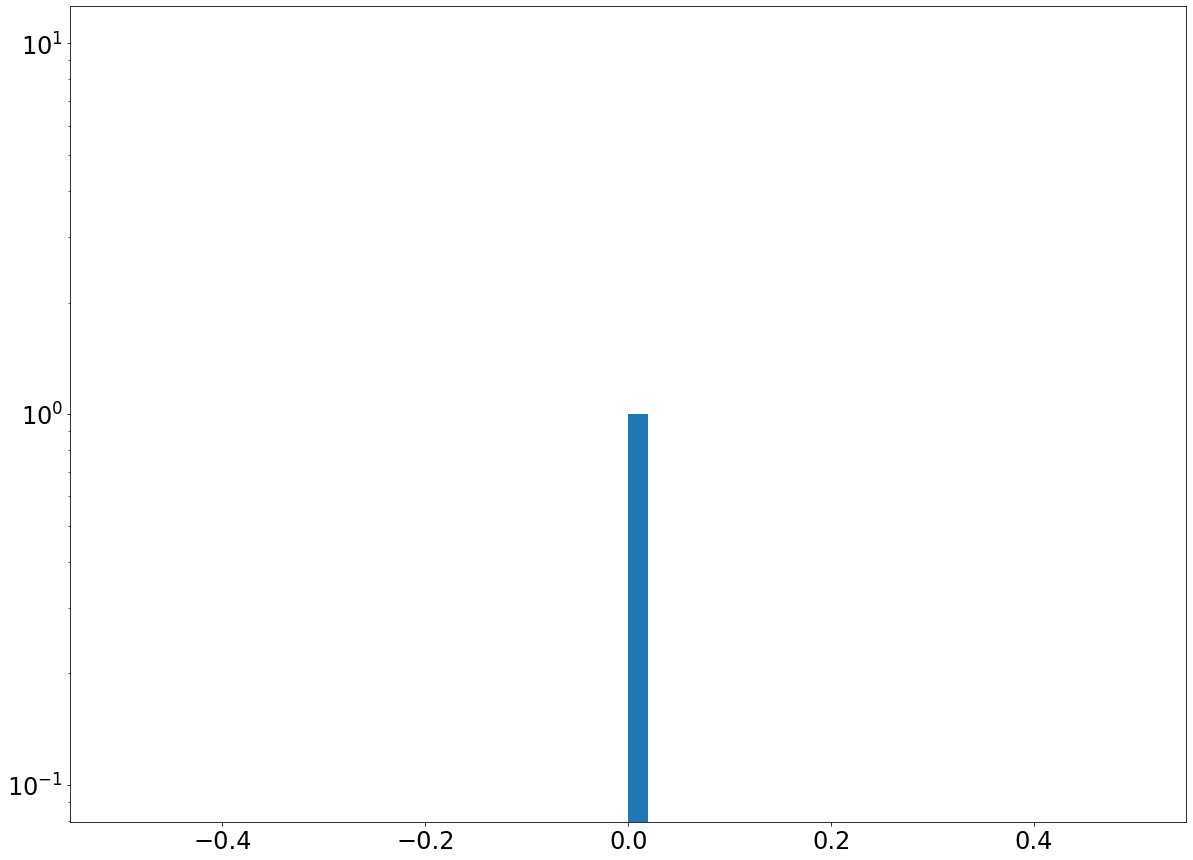

In [143]:
n, p = 100, 0.4
c = stats.binom.pmf(1, n, p)
ax = plt.hist(c,50)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.show()